In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import platform

# Mac용 한글 폰트 설정
if platform.system() == 'Darwin':
    plt.rcParams['font.family'] = 'AppleGothic'  # macOS 기본 한글 폰트
elif platform.system() == 'Windows':
    plt.rcParams['font.family'] = 'Malgun Gothic'  # Windows 용
else:
    plt.rcParams['font.family'] = 'NanumGothic'  # 리눅스나 기타

# 음수 깨짐 방지 (예: 막대그래프 아래로 향할 때 -값 표시)
plt.rcParams['axes.unicode_minus'] = False


In [3]:
data = pd.read_csv("우체국금융개발원_우체국 금융 사기계좌 정보_20241231.csv",encoding = 'cp949')

In [4]:
data.head(5)

,연령대,피해자 성별,최초 접수년,최초 접수월,피해자계좌_피해(송금)액,사기유형,사칭기관,피해구제 신청사유,접근매체
0,20,남,2022,1,990000,사건연루조사,경찰. 검찰. 법원,보이스피싱,전화
1,20,남,2022,1,300000,사건연루조사,경찰. 검찰. 법원,보이스피싱,전화
2,30,남,2022,1,1000000,지인사칭(메신저피싱),개인,보이스피싱,문자
3,30,여,2022,1,118000000,사건연루조사,경찰. 검찰. 법원,보이스피싱,전화
4,40,여,2022,1,33800000,기존대출 상환,할부금융(카드사 및 캐피탈),일반대출,문자


### 컬럼별 데이터 분포 파악

| 컬럼명 | 설명 | 분석 방향 | 시각화 추천 |
|--------|------|------------|--------------|
| `연령대` | 피해자의 연령대 (숫자형) | 연령대별 피해자 수 파악 | 막대그래프 (`countplot`) |
| `피해자 성별` | 남/여 | 성별 피해자 분포 | 파이차트, 막대그래프 |
| `최초 접수년`, `최초 접수월` | 사건이 처음 접수된 연도/월 | 연도별·월별 피해 추이 | 선그래프, 히트맵 |
| `피해자계좌_피해(송금)액` | 송금한 피해 금액 | 금액 분포, 평균, 합계 | 히스토그램, 박스플롯 |
| `사기유형` | 사기의 유형 | 유형별 건수 분포 | 막대그래프 |
| `사칭기관` | 사칭된 기관 (경찰, 법원, 개인 등) | 기관별 등장 빈도 | 막대그래프 |
| `피해구제 신청사유` | 피해자가 구제 신청한 이유 | 사유별 빈도 | 막대그래프, 워드클라우드 |
| `접근매체` | 전화, 문자 등 사기 수단 | 매체별 분포 | 막대그래프, 히트맵(사기유형과 조합) |


```

#### 연령대별 피해자수

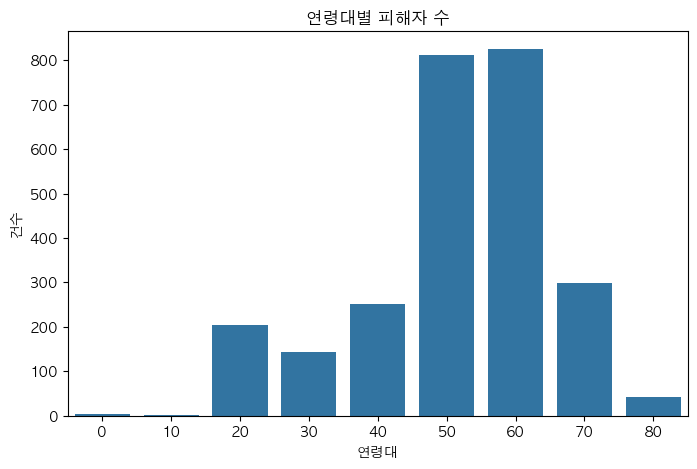

In [33]:
plt.figure(figsize=(8, 5))
sns.countplot(data=data, x='연령대', order=sorted(data['연령대'].unique()))
plt.title('연령대별 피해자 수')
plt.xlabel('연령대')
plt.ylabel('건수')
plt.show()

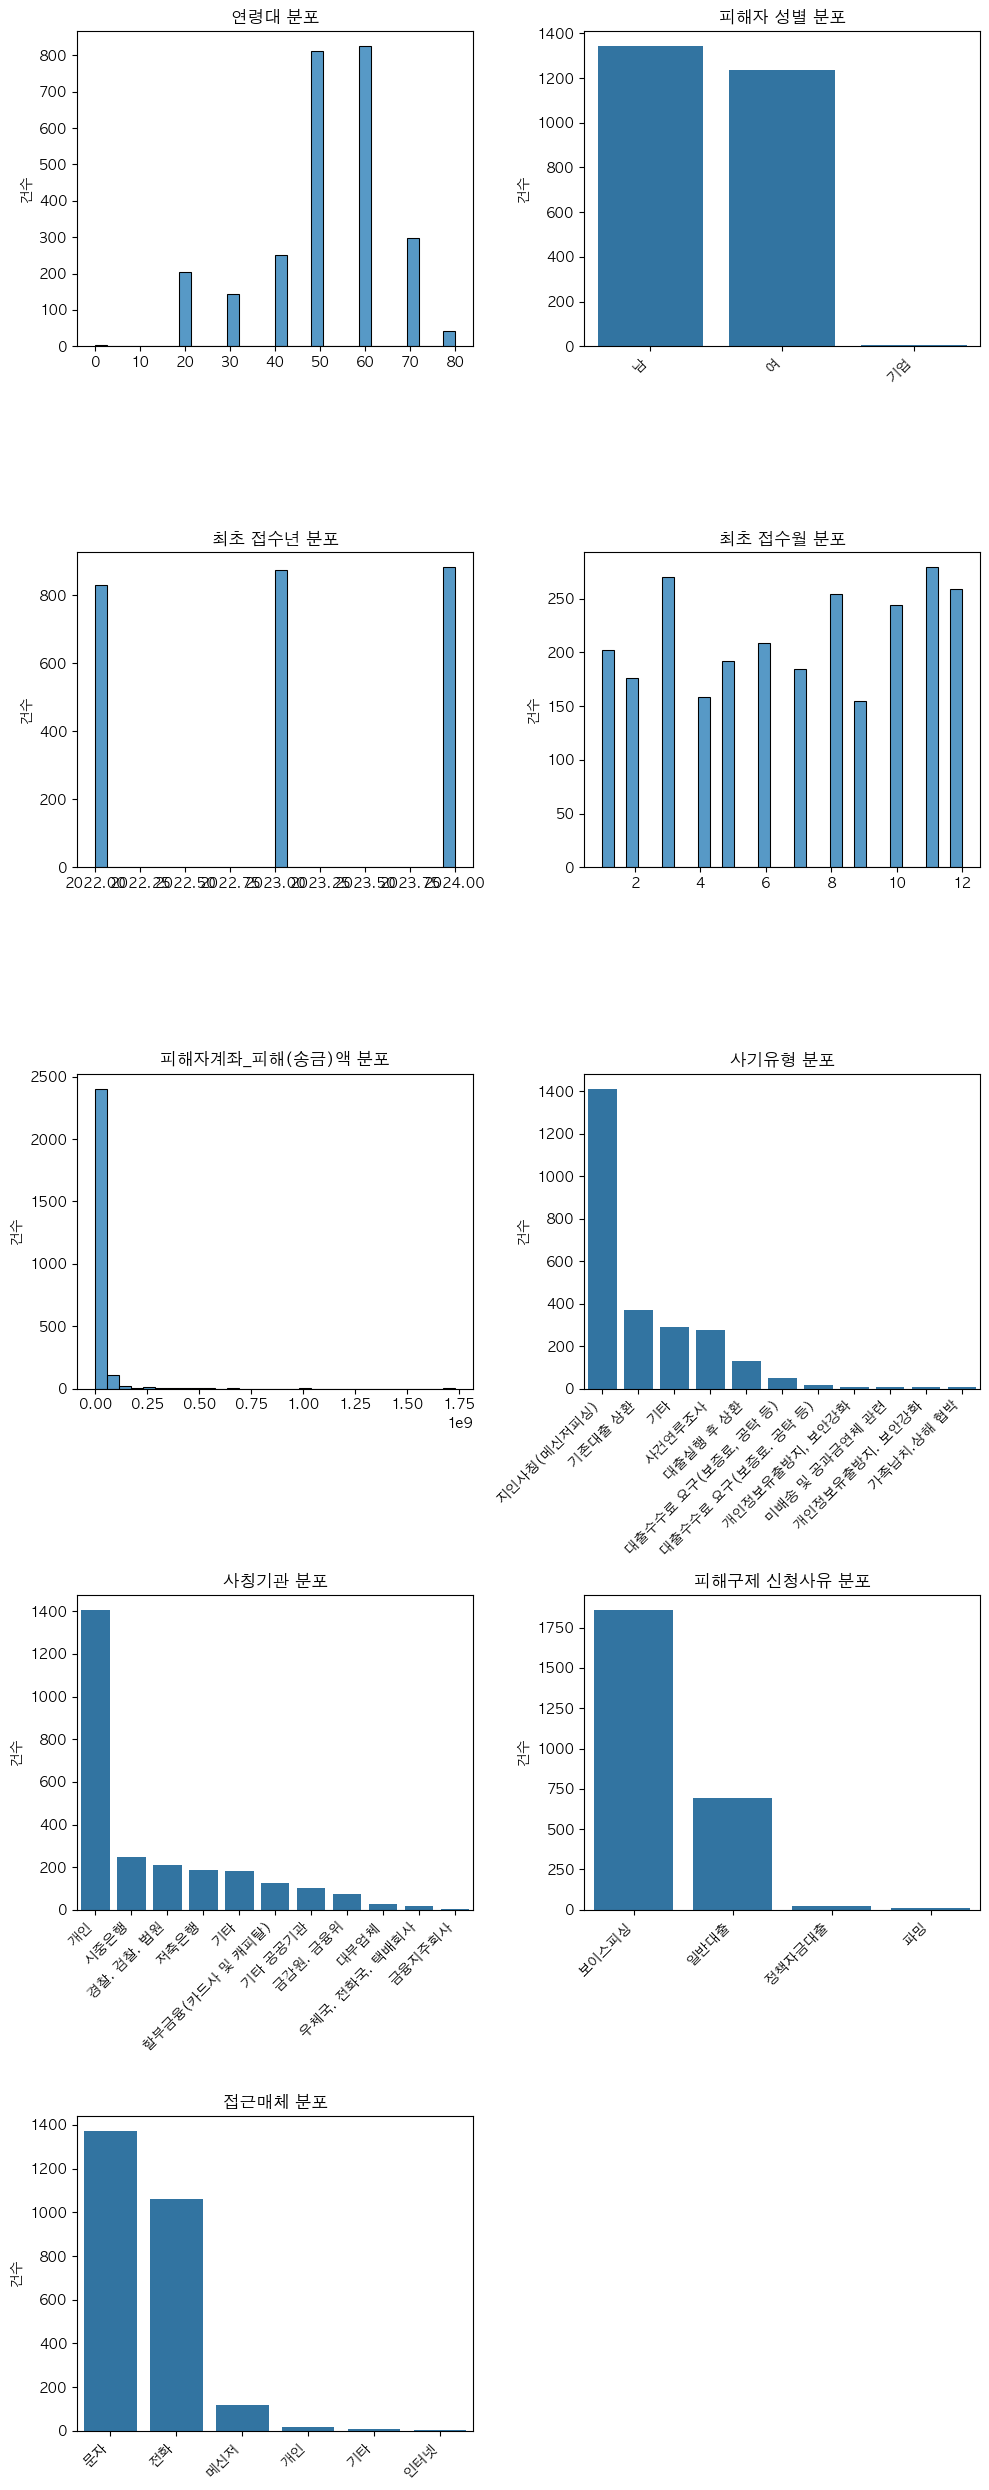

In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math

# 분석 대상 컬럼 리스트 (수치형은 히스토그램, 범주형은 countplot 추천)
columns = ['연령대', '피해자 성별', '최초 접수년', '최초 접수월',
           '피해자계좌_피해(송금)액', '사기유형', '사칭기관', '피해구제 신청사유', '접근매체']

# subplot 행/열 수 계산
n_cols = 2
n_rows = math.ceil(len(columns) / n_cols)

# 도화지 크기 설정
plt.figure(figsize=(10, 5 * n_rows))

# 컬럼별 subplot 반복
for idx, col in enumerate(columns):
    plt.subplot(n_rows, n_cols, idx + 1)
    
    # 수치형 → 히스토그램
    if pd.api.types.is_numeric_dtype(data[col]):
        sns.histplot(data[col], bins=30)
    else:  # 범주형 → countplot
        sns.countplot(data=data, x=col, order=data[col].value_counts().index)
        plt.xticks(rotation=45, ha='right')
    
    plt.title(f'{col} 분포')
    plt.xlabel('')
    plt.ylabel('건수')

# 레이아웃 조정
plt.tight_layout()
plt.show()


# 4번. 월별 피해 트렌드 분석

In [5]:
# 월별 피해 금액 합계 
monthly_trend = data.groupby('최초 접수월')['피해자계좌_피해(송금)액'].sum().sort_index()

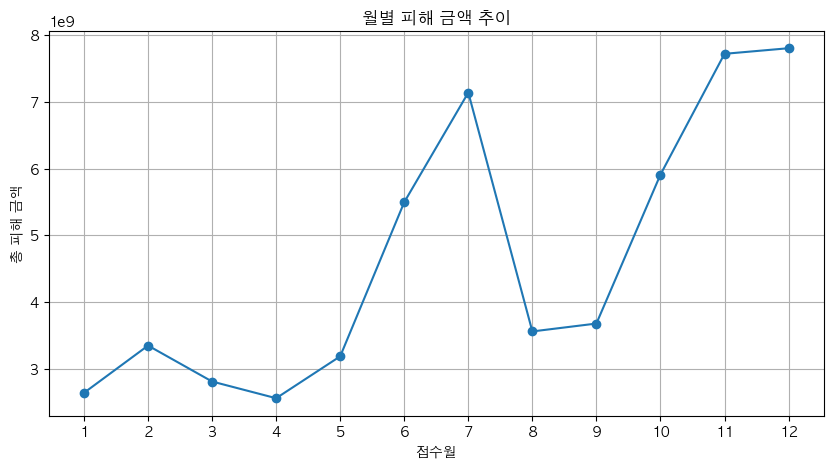

In [6]:
# 시각화
plt.figure(figsize=(10, 5))
monthly_trend.plot(kind='line', marker='o')
plt.title('월별 피해 금액 추이')
plt.xlabel('접수월')
plt.ylabel('총 피해 금액')
plt.grid(True)
plt.xticks(range(1,13))
plt.show()

# 5번. 접근매체별 피해 유형 비교

In [7]:
data[['접근매체', '사기유형']]

,접근매체,사기유형
0,전화,사건연루조사
1,전화,사건연루조사
2,문자,지인사칭(메신저피싱)
3,전화,사건연루조사
4,문자,기존대출 상환
...,...,...
2579,전화,대출실행 후 상환
2580,전화,기타
2581,메신저,기존대출 상환
2582,전화,기타


## 접근매체

In [8]:
media_counts = data['접근매체'].value_counts()
media_counts

접근매체
문자     1372
전화     1060
메신저     118
개인       20
기타        8
인터넷       6
Name: count, dtype: int64

In [9]:
data['접근매체'].unique()

array(['전화', '문자', '메신저', '인터넷', '개인', '기타'], dtype=object)

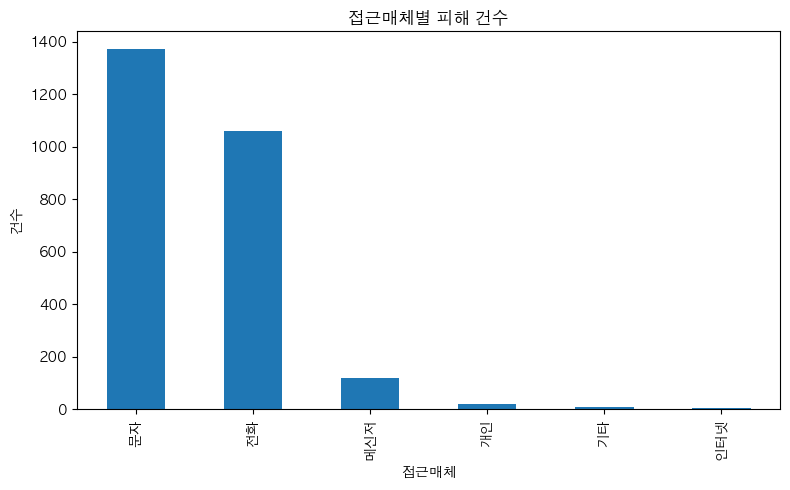

In [10]:
# 접근매체 빈도수 비교 : 막대그래프
plt.figure(figsize=(8,5))
media_counts.plot(kind='bar')
plt.title('접근매체별 피해 건수')
plt.xlabel('접근매체')
plt.ylabel('건수')
plt.tight_layout()
plt.show()

## 사기유형

In [11]:
data['사기유형'].unique()

array(['사건연루조사', '지인사칭(메신저피싱)', '기존대출 상환', '대출수수료 요구(보증료. 공탁 등)',
       '대출실행 후 상환', '기타', '개인정보유출방지. 보안강화', '대출수수료 요구(보증료, 공탁 등)',
       '개인정보유출방지, 보안강화', '미배송 및 공과금연체 관련', '가족납치.상해 협박'], dtype=object)

In [12]:
data['사기유형'].nunique()

11

In [13]:
fraud_type_counts = data['사기유형'].value_counts()
fraud_type_counts

사기유형
지인사칭(메신저피싱)            1411
기존대출 상환                 371
기타                      292
사건연루조사                  276
대출실행 후 상환               129
대출수수료 요구(보증료, 공탁 등)      52
대출수수료 요구(보증료. 공탁 등)      19
개인정보유출방지, 보안강화            9
미배송 및 공과금연체 관련            9
개인정보유출방지. 보안강화            8
가족납치.상해 협박                8
Name: count, dtype: int64

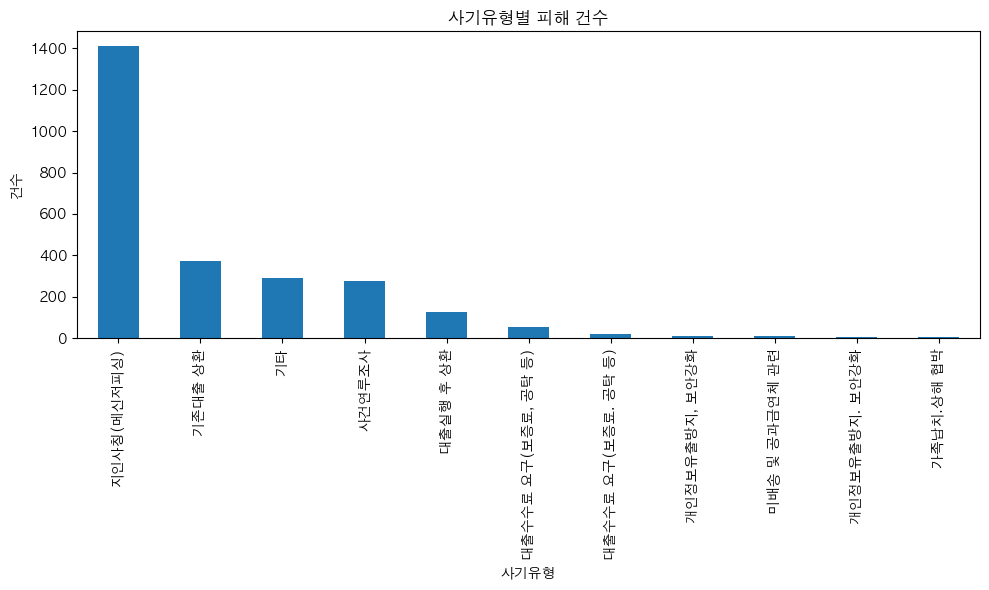

In [14]:
# 사기유형별 사기 건수 시각화 : 빈도 -> 막대그래프

plt.figure(figsize=(10,6))
fraud_type_counts.plot(kind='bar')
plt.title('사기유형별 피해 건수')
plt.xlabel('사기유형')
plt.ylabel('건수')
plt.tight_layout()
plt.show()

## 접근매체별 사기유형 발생 건수

- **접근매체**: `['전화', '문자', '메신저', '인터넷', '개인', '기타']`
- **사기유형**: `['사건연루조사', '지인사칭(메신저피싱)', '기존대출 상환', '대출수수료 요구(보증료. 공탁 등)',  
  '대출실행 후 상환', '기타', '개인정보유출방지. 보안강화', '대출수수료 요구(보증료, 공탁 등)',  
  '개인정보유출방지, 보안강화', '미배송 및 공과금연체 관련', '가족납치.상해 협박']`

- **행(Y축):** 접근매체 (`전화`, `문자`, `메신저`, `인터넷`, `개인`, `기타`)
- **열(X축):** 사기유형 (`사건연루조사`, `지인사칭(메신저피싱)`, `기존대출 상환`, 등)
- **셀 값:** 해당 접근매체와 사기유형 조합의 발생 건수
- **색깔:** 어두울수록 더 많이 발생한 조합

1. **가장 많은 사기 조합:**
   - `문자` + `지인사칭(메신저피싱)` = **1206건**
     > 이 조합이 히트맵에서 가장 짙은 색으로 표현됨. 문자로 메신저 피싱 유도하는 사례가 많음.

2. **그 외 주요 사기유형:**
   - `전화` + `기존대출 상환`: **334건**
   - `전화` + `개인정보유출방지. 보안강화`: **249건**
   - `전화` + `지인사칭(메신저피싱)`: **124건**
   - `전화` + `사건연루조사`: **106건**

3. **접근매체별 특성:**
   - `전화`: 다양한 사기 유형에 많이 쓰임. (전체적으로 고르게 퍼짐)
   - `문자`: **메신저 피싱**에 매우 집중됨.
   - `메신저`, `인터넷`, `개인`, `기타`: 건수가 많지 않지만, 특정 유형에 몰림.
     - 예: `메신저` + `사건연루조사` = 77건

### 🧠 결론 요약
- **메신저 피싱**은 주로 **문자**를 통해 시도됨.
- **전화 사기**는 여러 유형에 폭넓게 사용됨.
- 사기 대응 정책을 세울 때, **매체별 사기 유형 집중도**를 고려하면 효과적일 수 있음.

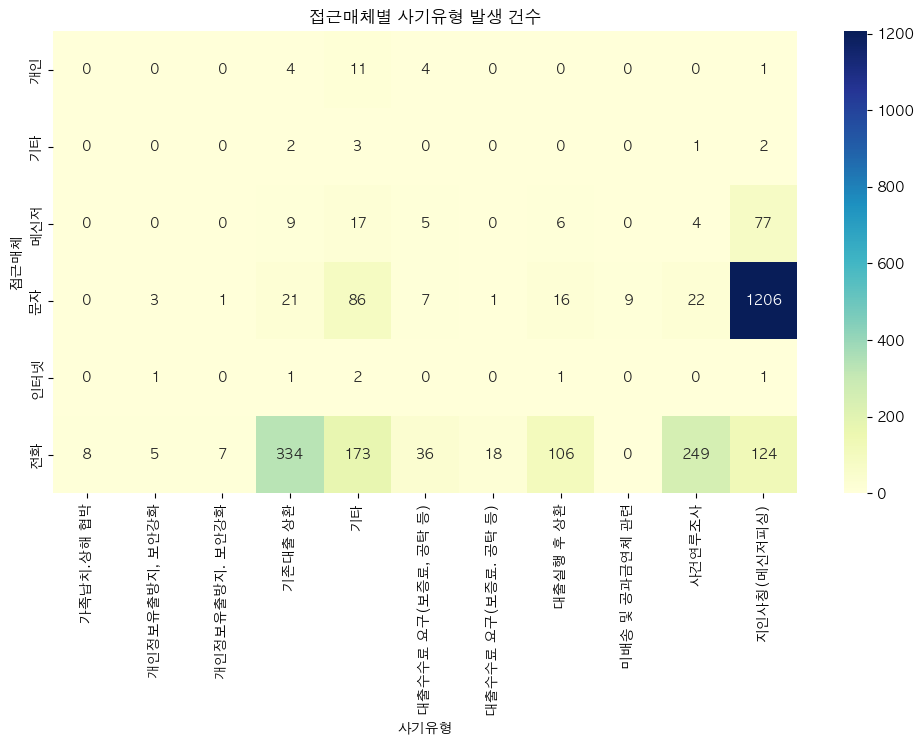

In [15]:
import seaborn as sns

# 접근매체와 사기유형 간 교차표 (건수 기준)
cross_tab = pd.crosstab(data['접근매체'], data['사기유형'])

# 히트맵 시각화
plt.figure(figsize=(12, 6))
sns.heatmap(cross_tab, annot=True, fmt='d', cmap='YlGnBu')
plt.title('접근매체별 사기유형 발생 건수')
plt.xlabel('사기유형')
plt.ylabel('접근매체')
plt.show()


### 6. ✅ **피해 구제 신청사유별 평균 피해액 분석**
- 목적: 어떤 이유로 피해 구제를 요청하는 사람들이 가장 피해가 큰지 확인
- 분석: `피해구제 신청사유` vs `피해자계좌_피해(송금)액`

In [17]:
data.head(5)

,연령대,피해자 성별,최초 접수년,최초 접수월,피해자계좌_피해(송금)액,사기유형,사칭기관,피해구제 신청사유,접근매체
0,20,남,2022,1,990000,사건연루조사,경찰. 검찰. 법원,보이스피싱,전화
1,20,남,2022,1,300000,사건연루조사,경찰. 검찰. 법원,보이스피싱,전화
2,30,남,2022,1,1000000,지인사칭(메신저피싱),개인,보이스피싱,문자
3,30,여,2022,1,118000000,사건연루조사,경찰. 검찰. 법원,보이스피싱,전화
4,40,여,2022,1,33800000,기존대출 상환,할부금융(카드사 및 캐피탈),일반대출,문자


In [26]:
reason_frequency = data['피해구제 신청사유'].value_counts()
reason_frequency

피해구제 신청사유
보이스피싱     1860
일반대출       691
정책자금대출      23
파밍          10
Name: count, dtype: int64

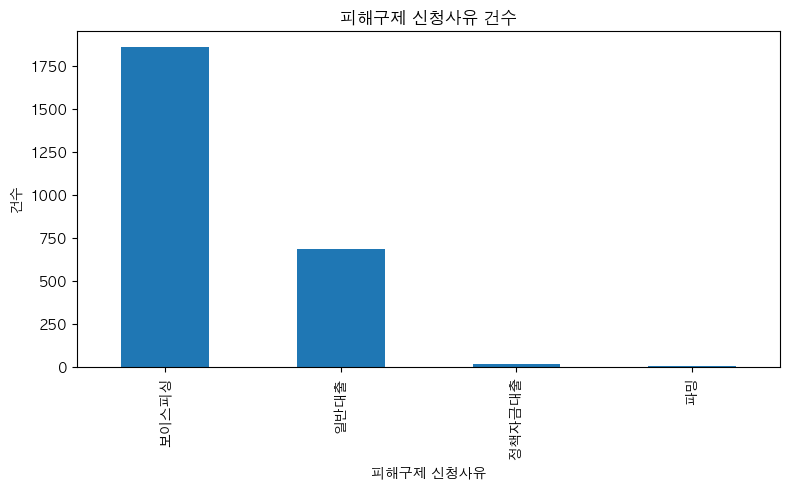

In [27]:
# 피해구제 빈도수 비교 : 막대그래프
plt.figure(figsize=(8,5))
reason_frequency.plot(kind='bar')
plt.title('피해구제 신청사유 건수')
plt.xlabel('피해구제 신청사유')
plt.ylabel('건수')
plt.tight_layout()
plt.show()

In [ ]:
ㅠ